#  kunder ska analyseras och prediktioner på vilka som lämnar med hjälp av MLPClassifier

In [1843]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.neural_network import MLPClassifier

In [1844]:
test_churn = pd.read_csv("/Users/ahmadzarzar/Downloads/csv_hämtade_filer/churn_test_CHN.csv")
train_churn = pd.read_csv("/Users/ahmadzarzar/Downloads/csv_hämtade_filer/churn_train_CHN.csv")

# Analysera datan

Denna dataset innehåller 7043 datapunkter och 21 attributer

In [1845]:
train_churn.shape

(5634, 21)

In [1846]:

test_churn.shape


(1409, 21)

In [1847]:
train_churn[pd.to_numeric(train_churn.TotalCharges,errors='coerce').isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1832,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
2121,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
2347,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
2651,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
2703,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
3294,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
3999,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
5162,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No


In [1848]:
test_churn[pd.to_numeric(test_churn.TotalCharges,errors='coerce').isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
765,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No
910,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1190,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


In [1849]:
train_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [1850]:
test_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1409 non-null   object 
 1   gender            1409 non-null   object 
 2   SeniorCitizen     1409 non-null   int64  
 3   Partner           1409 non-null   object 
 4   Dependents        1409 non-null   object 
 5   tenure            1409 non-null   int64  
 6   PhoneService      1409 non-null   object 
 7   MultipleLines     1409 non-null   object 
 8   InternetService   1409 non-null   object 
 9   OnlineSecurity    1409 non-null   object 
 10  OnlineBackup      1409 non-null   object 
 11  DeviceProtection  1409 non-null   object 
 12  TechSupport       1409 non-null   object 
 13  StreamingTV       1409 non-null   object 
 14  StreamingMovies   1409 non-null   object 
 15  Contract          1409 non-null   object 
 16  PaperlessBilling  1409 non-null   object 


Customers who stayed:   4148
Customers who churned:   1486


Text(0, 0.5, 'Count')

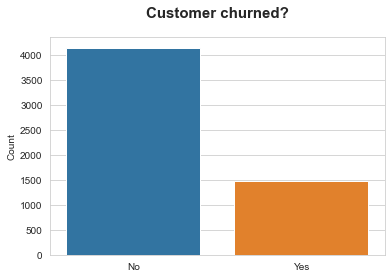

In [1851]:
target_dist = train_churn['Churn'].value_counts()
print('Customers who stayed:  ', target_dist[0])
print('Customers who churned:  ', target_dist[1])


# Visualize the customer churn distribution
sns.set_style('whitegrid')
sns.barplot(x=target_dist.index, y=target_dist.values)
plt.title('Customer churned?', pad=20, fontsize=15, fontweight='bold')
plt.ylabel('Count')

Det är uppenbart att det inte jämt fördelad det är klassobalans i vår datauppsättning eftersom det är typ 26,5 % av kunderna churnade medan 73,5 % av kunderna stannade.
och eftersom fördelningen är inte jämt fördelad så det kan ställa till problem, annars bör det vara jämt fördelad för undvika problem.

## DATA CLEANING

In [1852]:

train_churn['TotalCharges'] = train_churn.TotalCharges.replace({' ': 0})
train_churn['TotalCharges'] = pd.to_numeric(train_churn.TotalCharges, errors='coerce')


# remove the 9 rows with missing values
# print(train_churn.info())


train_churn = train_churn.drop('customerID', axis=1)

train_churn['Churn'] = train_churn.Churn.replace({'No': 0, 'Yes':1})





test_churn['TotalCharges'] = test_churn.TotalCharges.replace({' ': 0})
test_churn['TotalCharges'] = pd.to_numeric(test_churn.TotalCharges, errors='coerce')


# remove the 9 rows with missing values
# print(test_churn.info())


test_churn = test_churn.drop('customerID', axis=1)

test_churn['Churn'] = test_churn.Churn.replace({'No': 0, 'Yes':1})




x_train=train_churn.drop(columns=['Churn'])
y_train=train_churn.Churn

x_test =test_churn.drop(columns=['Churn'])
y_test= test_churn.Churn



In [1853]:
# Function to check if a string can be converted to a float
def is_convertible(value):
    """
    Checks to see whether a string can be converted to a float.
    Input:
        - A string
    Output:
        - A boolean indicating whether or not the string can be converted to a float
    """
    try:
        float(value)
        return True
    except ValueError:
        return False

    
    
# Initialize list of strings that can't be converted to a float
unconvertibles = []

# Iterate through an array of strings, and append unconvertible strings to a list
str_array = train_churn['TotalCharges'].to_numpy()
for element in str_array:
    if is_convertible(element) == False:
        unconvertibles.append(element)

# See which strings (if any) are unconvertible
print("Unconvertibles:  ", unconvertibles)
print("Count of unconvertibles:  ", len(unconvertibles))

Unconvertibles:   []
Count of unconvertibles:   0


In [1854]:
train_churn.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1499
TotalCharges        5290
Churn                  2
dtype: int64

## One-hot

In [1855]:
# generate the list of categorical and numerical variables
categorical_variables = train_churn.nunique()[train_churn.nunique() < 5].keys().to_list()

numerical_variables=list(set(train_churn.columns) - set(categorical_variables))
categorical_variables.remove('Churn')
############################################
categorical_variables = test_churn.nunique()[test_churn.nunique() < 5].keys().to_list()

numerical_variables=list(set(test_churn.columns) - set(categorical_variables))
categorical_variables.remove('Churn')

ohe = OneHotEncoder(drop='first', sparse=False)

X_train_ohe = ohe.fit_transform(x_train[categorical_variables])
X_train_ohe_df = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names(categorical_variables))

# Transform only without fitting
X_test_ohe = ohe.transform(x_test[categorical_variables])
X_test_ohe_df = pd.DataFrame(X_test_ohe, columns=ohe.get_feature_names(categorical_variables))


scaler = StandardScaler()
X_train_sc = scaler.fit_transform(x_train[numerical_variables])
X_train_sc_df = pd.DataFrame(X_train_sc, columns=numerical_variables)

# Transform only without fitting
X_test_sc = scaler.transform(x_test[numerical_variables])
X_test_sc_df = pd.DataFrame(X_test_sc, columns=numerical_variables)

# Merging the transformed dataframe togheter
x_train = pd.merge(X_train_ohe_df, X_train_sc_df, left_index=True, right_index=True)
x_test = pd.merge(X_test_ohe_df, X_test_sc_df, left_index=True, right_index=True)

/Users/ahmadzarzar/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/ahmadzarzar/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [1856]:
x_train.head()

,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MonthlyCharges,tenure,TotalCharges
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-1.312875,-1.288424,-1.001917
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.483491,-1.125599,-0.970931
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.696919,1.113244,2.037446
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.468583,-1.125599,-0.967078
4,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.999548,0.502651,0.911212


In [1857]:
x_test.head()

,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MonthlyCharges,tenure,TotalCharges
0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.812623,-1.207012,-0.972275
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.223171,0.380532,0.869194
2,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.307650,0.421238,0.947769
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.191194,-1.288424,-0.981920
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.683419,-0.962774,-0.835363


## MinMaxScaler data transformation

In [1858]:
cols_to_scale=['MonthlyCharges','TotalCharges','tenure']
scaler=MinMaxScaler()

In [1859]:
x_train[cols_to_scale]=scaler.fit_transform(x_train[cols_to_scale])

In [1860]:
x_test[cols_to_scale]=scaler.fit_transform(x_test[cols_to_scale])

In [1861]:
x_train.head()

,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MonthlyCharges,tenure,TotalCharges
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.069154,0.013889,0.002902
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.017910,0.069444,0.011002
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.973134,0.833333,0.797474
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.022388,0.069444,0.012009
4,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.763682,0.625000,0.503046


In [1862]:
x_test.head()

,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MonthlyCharges,tenure,TotalCharges
0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.218402,0.041667,0.010669
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.839737,0.583333,0.492895
2,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.865521,0.597222,0.513472
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.524772,0.013889,0.008143
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.257836,0.125000,0.046522


## Träna 5 olika neurala nätverk 

Accuracy: 79.20511000709723%


/Users/ahmadzarzar/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


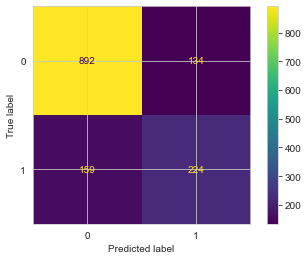

In [1863]:
clf_1 = MLPClassifier(learning_rate_init=0.01,hidden_layer_sizes=(5,5,5,5), random_state=42)
clf_1.fit(x_train, y_train)

score_1=clf_1.score(x_test,y_test)
print(f'Accuracy: {score_1*100}%')


plot_confusion_matrix(clf_1, x_test, y_test)  
plt.show()


Som vi ser när vi har tränat vår modell och när  så får vi i testscore 79.20 vilket är ganska bra men modellen har ändå svårt att klassificera några klasser så om vi kollar på 1 i predicted label axeln så kolla vi uppåt så ser vi att den gissade 134 gånger på 0 och  när den var 0 i predicted label axeln istellet så hittar vi att den predictade 159 gånger på 1 när den var 0 så det är inte så mycket i andelen men den har ändå svårt för 20% av klasser att klassificera. 

Accuracy: 76.5081618168914%


/Users/ahmadzarzar/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


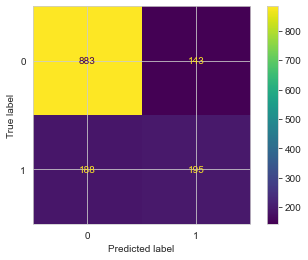

In [1864]:
clf_2 = MLPClassifier(learning_rate_init=0.01,hidden_layer_sizes=(100, 100), random_state=42)
clf_2.fit(x_train, y_train)


score_2=clf_2.score(x_test,y_test)
print(f'Accuracy: {score_2*100}%')


plot_confusion_matrix(clf_2, x_test, y_test)  
plt.show()



Som vi ser när vi har tränat vår modell och när  så får vi i testscore 76.50 vilket är ganska bra men modellen har ändå svårt att klassificera några klasser så om vi kollar på 1 i predicted label axeln så kolla vi uppåt så ser vi att den gissade 143 gånger på 0 och  när den var 0 i predicted label axeln istellet så hittar vi att den predictade 188 gånger på 1 när den var 0 så det är inte så mycket i andelen men den har ändå svårt för 23% av klasser att klassificera. 

Accuracy: 75.2306600425834%


/Users/ahmadzarzar/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


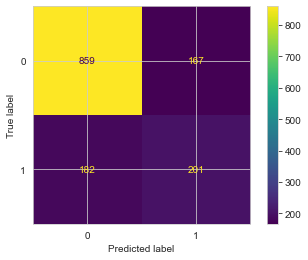

In [1865]:
clf_3 = MLPClassifier(learning_rate_init=0.01,hidden_layer_sizes=(100,100,100,100,100,100,100,100,100,100), random_state=42)
clf_3.fit(x_train, y_train)

score_3=clf_3.score(x_test,y_test)
print(f'Accuracy: {score_3*100}%')


plot_confusion_matrix(clf_3, x_test, y_test)  
plt.show()



Som vi ser när vi har tränat vår modell och när  så får vi i testscore 75.23 vilket är ganska bra men modellen har ändå svårt att klassificera några klasser så om vi kollar på 1 i predicted label axeln så kolla vi uppåt så ser vi att den gissade 176 gånger på 0 och  när den var 0 i predicted label axeln istellet så hittar vi att den predictade 182 gånger på 1 när den var 0 så det är inte så mycket i andelen men den har ändå svårt för 24% av klasser att klassificera. 

Accuracy: 78.63733144073811%


/Users/ahmadzarzar/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ahmadzarzar/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


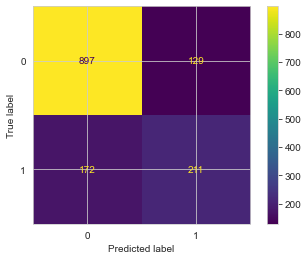

In [1866]:
clf_4 = MLPClassifier(learning_rate_init=0.0001,hidden_layer_sizes=(100, 100), random_state=42)
clf_4.fit(x_train, y_train)

score_4=clf_4.score(x_test,y_test)
print(f'Accuracy: {score_4*100}%')


plot_confusion_matrix(clf_4, x_test, y_test)  
plt.show()


Som vi ser när vi har tränat vår modell och när  så får vi i testscore 78.63 vilket är ganska bra men modellen har ändå svårt att klassificera några klasser så om vi kollar på 1 i predicted label axeln så kolla vi uppåt så ser vi att den gissade 129 gånger på 0 och  när den var 0 i predicted label axeln istellet så hittar vi att den predictade 172 gånger på 1 när den var 0 så det är inte så mycket i andelen men den har ändå svårt för 21% av klasser att klassificera. 

Accuracy: 79.55997161107167%


/Users/ahmadzarzar/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ahmadzarzar/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


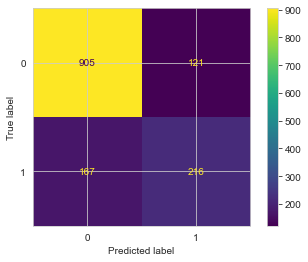

In [1867]:
clf_5 = MLPClassifier(learning_rate_init=0.00001,hidden_layer_sizes=(100, 100), random_state=42)
clf_5.fit(x_train, y_train)


score_5=clf_5.score(x_test,y_test)
print(f'Accuracy: {score_5*100}%')


plot_confusion_matrix(clf_5, x_test, y_test)  
plt.show()




Som vi ser när vi har tränat vår modell och när  så får vi i testscore 79.55 vilket är ganska bra men modellen har ändå svårt att klassificera några klasser så om vi kollar på 1 i predicted label axeln så kolla vi uppåt så ser vi att den gissade 121 gånger på 0 och  när den var 0 i predicted label axeln istellet så hittar vi att den predictade 167 gånger på 1 när den var 0 så det är inte så mycket i andelen men den har ändå svårt för 20% av klasser att klassificera. 

## Jämför tiden de tar att träna

När vi kollar på resultatet så ser vi att det är skillnad på tiden mellen dessa 5 modeller som vi tränade ovan om vi börjar med den första så ser vi att det tog 0.8sek så vi går vidare till andra modellen för att jämför med det första så ser vi att det tog 3.7 sek och här har vi första skilnaden med tiden, och frågan här varför? jo på första modellen hade vi 4 gömda lager med 5 neuroner i varje, och learningrate var 0.01 men andra modellen så var det 2 gömda lager med 100 neuroner, och learningrate var 0.01 så här ser vi att vi ökade antal neuroner i andra modellen så det tåg längre tid för att bearbeta det med datan, och då tar vi den tredje modellen så ser vi att det tog 17,2 sek för att vi har 10 gömda lager med 100 neuroner i varje,och learningrate var 0.01 och här ser vi efter de jämförlse som vi genomfört så har vi kommit fram till att antal gömda lager och hur många neuroner i varje, samt learningrate när vi väljer att använda oss av stora tal som vi gjorde typ 10,100, 0.00001 därför tar längre tid för modullen behöver bearbeta mer med data varje gånga vi ökar antalet jämfört med default läge.

# Utvärdera modellerna

# VG

In [1874]:
clf = MLPClassifier(learning_rate_init=0.1,solver='adam',alpha=1e-5,hidden_layer_sizes=(10,10,10,10,10,10)
,random_state=1,n_iter_no_change=50)
clf.fit(x_train, y_train)


/Users/ahmadzarzar/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 10, 10, 10, 10, 10),
              learning_rate_init=0.1, n_iter_no_change=50, random_state=1)

In [1873]:
score=clf.score(x_test,y_test)
print(f'Accuracy: {score*100:.2f}%')


Accuracy: 80.62%


Nu har vi Accuracy 80.62 vilket jag verkligen kämpat för jag vill börja med och att säga att jag har experimenterat typ alla Parametarna dock att det finns några som man var tuvungen att ändra på solver osv för få de att funka men efter mina experimenter så har jag fått 80.62 då det är inte så mycket över 80 men det är ändå lite över 80 jag har först använt mig av Parameter learning_rate_init och den Den initiala inlärningshastigheten som används den styr stegstorleken vid uppdatering av vikterna används endast när solver='sgd' eller 'adam'. andra prametern är solver och den är Lösaren för viktoptimering, då har jag ställt den på adam för den ska passa med andra prameter som jag använde, adam står för eller hänvisar till en stokastisk gradientbaserad optimerare föreslagen av Kingma, Diederik och Jimmy Ba Obs: Standardlösaren 'adam' fungerar ganska bra på relativt stora datamängder (med tusentals träningsprov eller fler) när det gäller både träningstid och valideringspoäng. För små datauppsättningar kan. den tredje är alpha och Styrkan i regulariseringsperioden regulariseringstermen divideras med urvalsstorleken när den läggs till. Den fjärde är hidden_layer_sizes denna parametern representerar antalet neuroner i det dolda lagret. den femte parametern är n_iter_no_change den är maximalt antal epoker för att inte möta tolförbättring. Endast effektiv när solver='sgd' eller 'adam'. och den sista är randomstate för att hålla oss i samma resultat, men som jag sa i början jag testade typ alla parameterna tills jag kom till denna kombinationen har testat dock på de massa olika värde till slut så hamnade jag med dessa värde på de när jag fick det resultatet och märkte att jag inte går för mig att få upp det mer än så men så gjorde jag för att få det resultatet.

/Users/ahmadzarzar/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


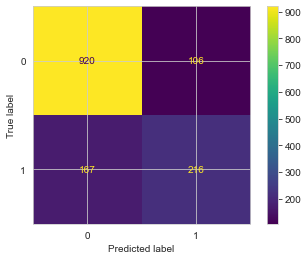

In [1870]:
plot_confusion_matrix(clf, x_test, y_test)  
plt.show()

Som vi ser när vi har tränat vår modell och när  så får vi i testscore 80.62 vilket är ganska bra men modellen har ändå svårt att klassificera några klasser så om vi kollar på 1 i predicted label axeln så kolla vi uppåt så ser vi att den gissade 106 gånger på 0 och  när den var 0 i predicted label axeln istellet så hittar vi att den predictade 167 gånger på 1 när den var 0 så det är inte så mycket i andelen men den har ändå svårt för 19% av klasser att klassificera. 